<a href="https://colab.research.google.com/github/mohammadashraf2004/Python-/blob/main/Kaggle_MNIST_Competetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from zipfile import ZipFile
dataset = '/content/test.csv.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from zipfile import ZipFile
dataset = '/content/train.csv.zip'

with ZipFile(dataset,'r') as zip1:
  zip1.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Display the shapes of the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Check the first few rows of the training data
print(train_data.head())


Training data shape: (42000, 785)
Testing data shape: (28000, 784)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixe

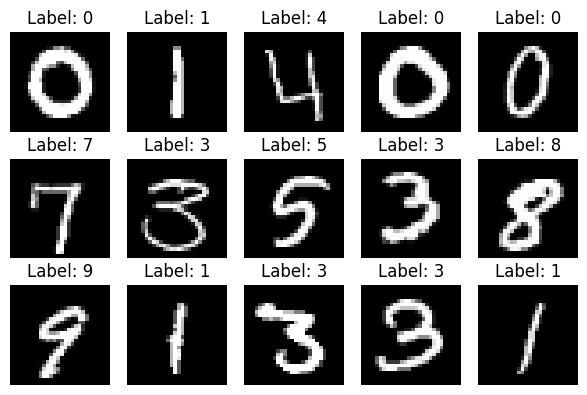

In [19]:
plt.figure(figsize=(6, 4))
for i in range(1, 16):
    plt.subplot(3, 5, i)
    img = train_data.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {train_data.iloc[i, 0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# Separate features and labels
X = train_data.drop('label', axis=1) / 255.0
y = train_data['label']
X_test = test_data / 255.0
# Reshape the data to (num_samples, 28, 28, 1)
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

y_train = to_categorical(y, num_classes = 10)

# Verify the shapes
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Test shape: {X_test.shape}")

Features shape: (42000, 28, 28, 1)
Labels shape: (42000,)
Test shape: (28000, 28, 28, 1)


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Training data shape: (33600, 28, 28, 1)
Validation data shape: (8400, 28, 28, 1)
Test data shape: (28000, 28, 28, 1)


In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=5,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.8458 - loss: 0.4803 - val_accuracy: 0.9805 - val_loss: 0.0641
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9744 - loss: 0.0813 - val_accuracy: 0.9851 - val_loss: 0.0467
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9832 - loss: 0.0558 - val_accuracy: 0.9871 - val_loss: 0.0383
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.9879 - val_loss: 0.0366
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9894 - val_loss: 0.0327


In [33]:
print("Evaluating model...")
scores = model.evaluate(X_val, y_val)  # or use test_dataset if available
print(f"Validation Accuracy: {scores[-1] * 100:.2f}%")

Evaluating model...
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9903 - loss: 0.0337
Validation Accuracy: 98.94%


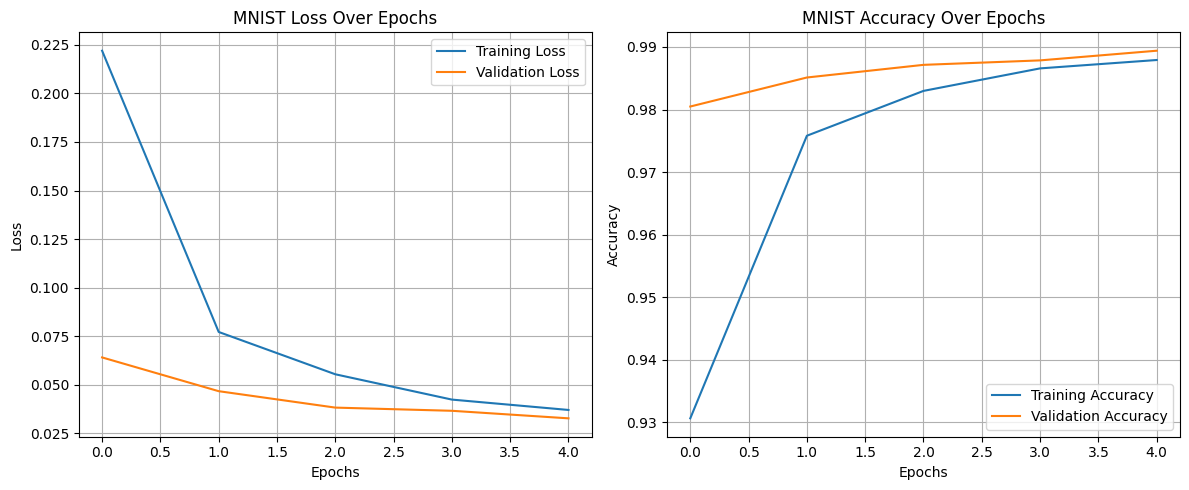

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot the loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MNIST Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()  # Adjusts the layout
plt.show()


In [38]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_val, y_pred_classes)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       785
           1       0.99      1.00      0.99       949
           2       0.99      0.99      0.99       838
           3       0.99      0.99      0.99       858
           4       0.99      0.99      0.99       796
           5       0.99      0.99      0.99       800
           6       0.99      1.00      0.99       870
           7       0.99      0.98      0.98       860
           8       0.99      0.98      0.98       817
           9       0.98      0.98      0.98       827

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



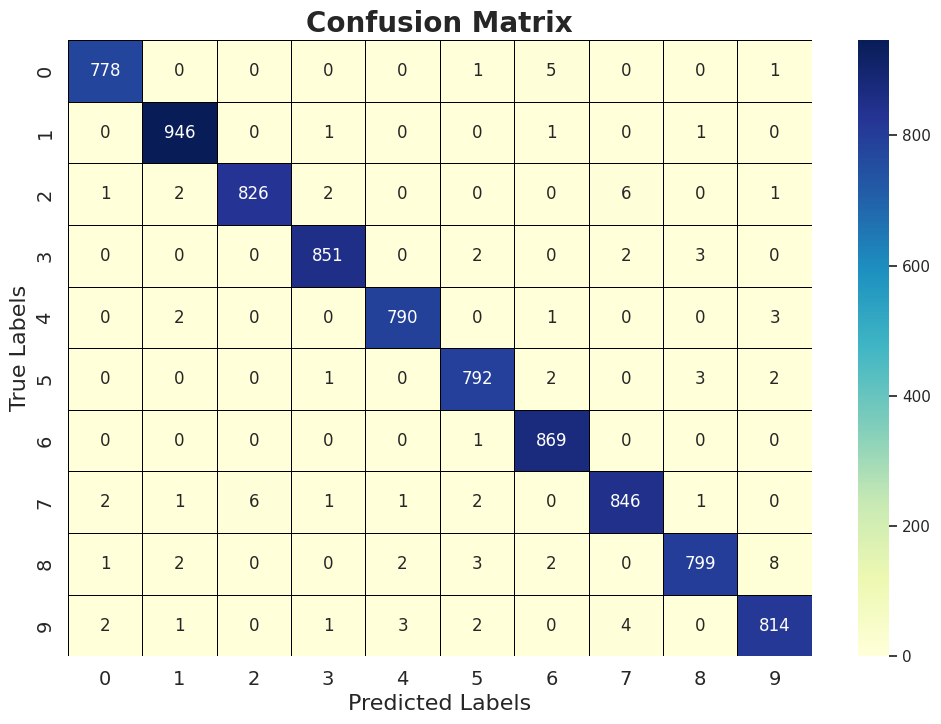

In [46]:
cm = confusion_matrix(y_val, y_pred_classes)

# Set the style of the plot
sns.set(style='whitegrid')

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the confusion matrix using seaborn with different aesthetics
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu', cbar=True,
            xticklabels=np.arange(10), yticklabels=np.arange(10),
            linewidths=.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix', fontsize=20, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)

# Adjust ticks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [47]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Prepare the submission file
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

submission.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step
Your submission was successfully saved!


<ipython-input-54-3285b1bcebd3>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Change style to seaborn-darkgrid


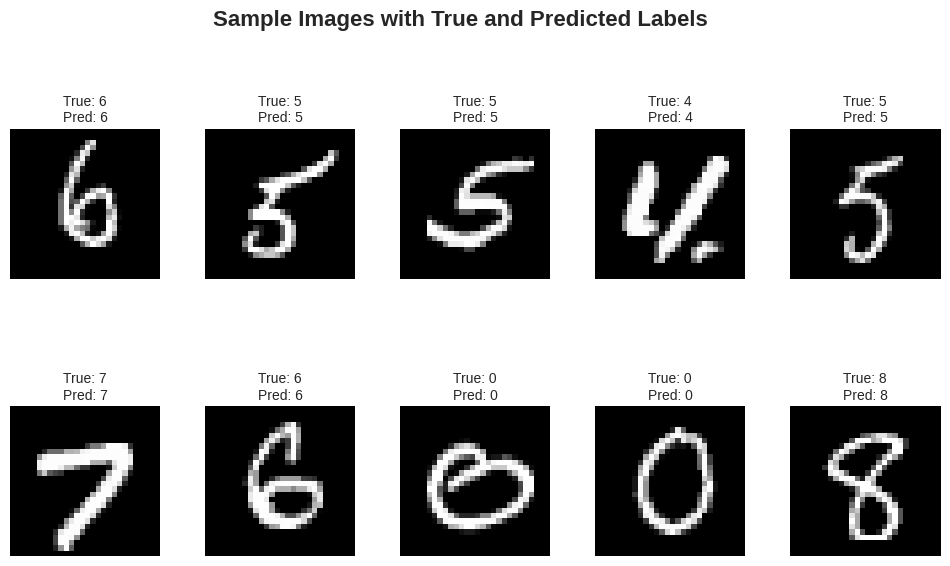

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample 10 random images
num_images = 10
random_indices = np.random.choice(len(X_val), num_images, replace=False)
X_sample = X_val[random_indices]
y_true_sample = y_val.iloc[random_indices]
y_pred_sample = y_pred_classes[random_indices]

# Set the style
plt.style.use('seaborn-darkgrid')  # Change style to seaborn-darkgrid

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_sample[i].reshape(28, 28), cmap='gray')

    # Use a more stylish title with adjusted font size and padding
    plt.title(f"True: {y_true_sample.iloc[i]}\nPred: {y_pred_sample[i]}", fontsize=10, pad=5)
    plt.axis('off')

# Add a main title for the entire plot
plt.suptitle('Sample Images with True and Predicted Labels', fontsize=16, fontweight='bold', y=1.05)

# Increase spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [55]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
